In [1]:
import numpy as np
import matplotlib.pyplot as plt

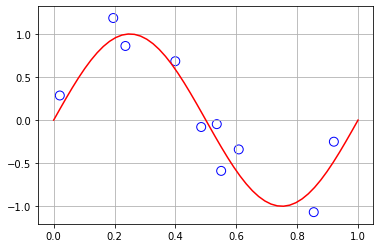

10 10


In [4]:
expdat = np.genfromtxt(fname='resources/ex3/RegressionData.txt', delimiter=' ',
                       dtype=np.float)
x = expdat[:, 0]
y = expdat[:, 1]
x_compare = np.linspace(0, 1, 50)
y_compare = np.sin(x_compare*2*np.pi)
plt.scatter(x, y, s=80, facecolors='none', edgecolors='b')
plt.plot(x_compare, y_compare, 'r')
plt.grid(True)
plt.show()

print(x.size, y.size)

In [42]:
class MLP:  
    def __init__(self, n_hidden, n_output, hidden_distr = [-0.5, 0.5], output_distr = [-0.5, 0.5], bias_distr = [-0.5, 0.5]):
        self.n_hidden = n_hidden
        self.n_output = n_output
        self.hidden_distr = hidden_distr
        self.output_distr = output_distr
        self.bias_distr = bias_distr
        self.w_h = np.random.uniform(output_distr[0], output_distr[1], n_hidden)
        self.w_o = np.random.uniform(hidden_distr[0], hidden_distr[1], n_hidden)
        self.b_w_h = np.random.uniform(bias_distr[0], bias_distr[1], n_hidden)
        self.b_w_o = np.random.uniform(bias_distr[0], bias_distr[1], 1)
        self.b0 = 1.0
        self.b1 = 1.0
        
    
    def hidden_output(self, x):
        hidden = x * self.w_h + self.b0 * self.b_w_h
        return np.tanh(hidden)
    
    def activations(self, x):
        hidden = x * self.w_h + self.b0 * self.b_w_h
        return hidden
    
    def output(self, x): 
        hidden = self.hidden_output(x)
        out = np.sum(hidden * self.w_o) + self.b1*self.b_w_o
        return out
    
    def batch_output(self, x):
        out_batch = np.zeros(x.size)
        for i in range(x.size):
            out_batch[i] = self.output(x[i])
        return out_batch
    
    def batch_hiddens(self, x):
        out_batch = np.zeros(( x.size, self.n_hidden))
        for i in range(x.size):
            out_batch[i] = self.hidden_output(x[i])
        return out_batch        
        
    def error(self, x, y):
        out = self.output(x)
        err = (out - y)
        return err
    
    def batch_error(self, x, y):
        errors = np.zeros(x.size)
        for i in range(errors.size):
            errors[i] = (self.error(x[i], y[i]))**2 / 2.0
        return np.sum(errors) / errors.size
    
    def transfer_derivative(self, output):
	    return 1 - np.tanh(output)**2
    
    def backpropagation(self, x, y, step = 0.5):
        p = x.size
        for i in range(p):            
            error = self.error(x[i], y[i])
            activations = self.activations(x[i])
            self.b_w_o = self.b_w_o - (step * (1 * error) / p)
            self.b_w_h = self.b_w_h - (step * (1 * self.transfer_derivative(activations) * error) / p)
            self.w_o = self.w_o - (step * (self.hidden_output(x[i]) * error) /  p)
            self.w_h = self.w_h - (step * (x[i] * self.transfer_derivative(activations) * error) / p)
    
    def stopCriterion(self, treshold, E_t, delta):
        return (treshold > (delta/E_t))
        
    def printWeights(self):
        print('Hidden Weights: ', self.w_h)
        print('\n\n Output Weights: ', self.w_o)
        print('\n\n Hidden Bias Weights: ', self.b_h)
        print('\n\n Output Bias Weights: ', self.b_o)

In [37]:
hidden = 3
distribution = [-0.5, 0.5]
reference_inputs = np.linspace(0, 1, 50)
t_max = 3000
error_treshold = 10e-5
E_t = 0.1
d_E_t = 1000
learning_rate = 0.5
criterion = False

In [62]:
np.random.seed(1)
m_MLP = MLP(hidden, 1)
epoch = 0
errors = []
while epoch < t_max and not criterion:
    new_E_t = m_MLP.batch_error(x, y)
    errors.append(new_E_t)
    d_E_t = np.abs(new_E_t-E_t)
    E_t = new_E_t
    m_MLP.backpropagation(x, y, learning_rate)
    if epoch % 100 == 0:
        print('Training Error: ', E_t, '\tNumber of Epochs: ', epoch)
    epoch = epoch + 1
    criterion = m_MLP.stopCriterion(error_treshold, E_t, d_E_t)
  
activations = m_MLP.batch_hiddens(reference_inputs)

Training Error:  0.2508262997701855 	Number of Epochs:  0
Training Error:  0.08969041510026213 	Number of Epochs:  100
Training Error:  0.0864290987928418 	Number of Epochs:  200
Training Error:  0.08175308420466465 	Number of Epochs:  300
Training Error:  0.0761089163917136 	Number of Epochs:  400
Training Error:  0.06931892572458956 	Number of Epochs:  500
Training Error:  0.05941754471091012 	Number of Epochs:  600
Training Error:  0.04741366929200805 	Number of Epochs:  700
Training Error:  0.03706987651741288 	Number of Epochs:  800
Training Error:  0.030902083031188833 	Number of Epochs:  900
Training Error:  0.028266768131099056 	Number of Epochs:  1000
Training Error:  0.02751009501603858 	Number of Epochs:  1100
Training Error:  0.027482597734503893 	Number of Epochs:  1200
Training Error:  0.027648267632903872 	Number of Epochs:  1300
Training Error:  0.027816407547125704 	Number of Epochs:  1400
Training Error:  0.027940089067678864 	Number of Epochs:  1500
Training Error:  

No handles with labels found to put in legend.


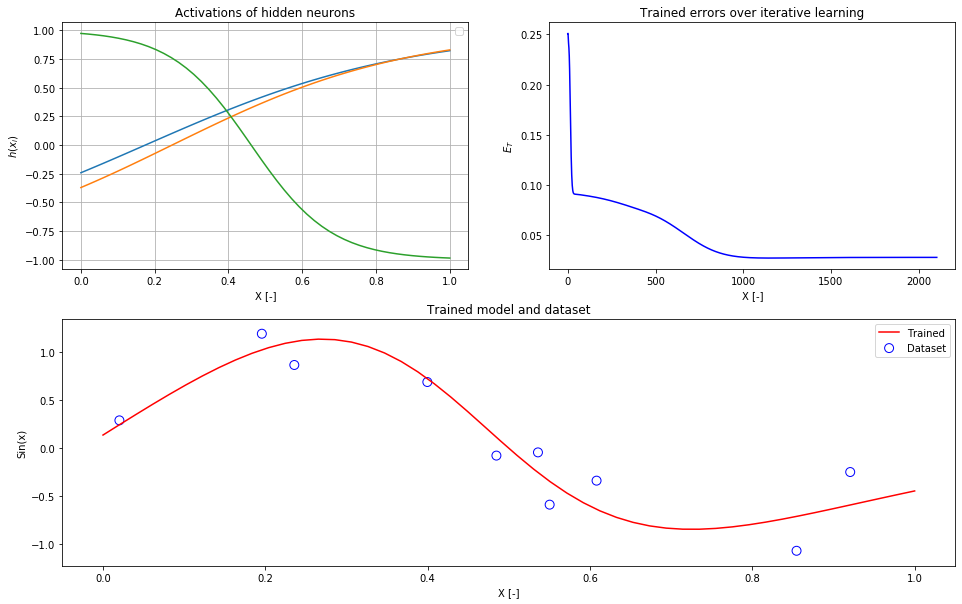

In [67]:
f = plt.figure(figsize=(16,10))
ax1 = f.add_subplot(212)
ax2 = f.add_subplot(221)
ax3 = f.add_subplot(222)
ax1.plot(reference_inputs, m_MLP.batch_output(reference_inputs), 'r', label = 'Trained')
ax1.scatter(x, y, s=80, facecolors='none', edgecolors='b', label = 'Dataset')
ax1.set(xlabel='X [-]', ylabel='Sin(x)',
       title='Trained model and dataset')
ax1.grid()
ax1.legend()

ax2.plot(reference_inputs, activations)
ax2.set(xlabel='X [-]', ylabel='$h(x_i)$',
       title='Activations of hidden neurons')
ax2.grid()
ax2.legend()

ax3.plot(np.linspace(0, epoch, epoch), errors, 'b', label = 'Train Errors')
ax3.set(xlabel='X [-]', ylabel='$E_T$',
       title='Trained errors over iterative learning')
ax1.grid()
ax1.legend()

plt.show()

In [72]:
m_MLP_10 = MLP(10, 1)
epoch = 0
E_t = 0.1
d_E_t = 1000
t_max = 50000
error_treshold = 10e-8
criterion = False
errors_10 = []
learning_rate = 10e-3

while epoch < t_max and not criterion:
    new_E_t = m_MLP_10.batch_error(x, y)
    errors_10.append(new_E_t)
    d_E_t = np.abs(new_E_t-E_t)
    E_t = new_E_t
    m_MLP_10.backpropagation(x, y, learning_rate)
    if epoch % 2500 == 0:
        print('Training Error: ', E_t, '\tNumber of Epochs: ', epoch)
    epoch = epoch + 1
    criterion = m_MLP_10.stopCriterion(error_treshold, E_t, d_E_t)
  
activations_10 = m_MLP_10.batch_hiddens(reference_inputs)

Training Error:  0.6250590778694477 	Number of Epochs:  0
Training Error:  0.14360221308384463 	Number of Epochs:  500
Training Error:  0.09335676232719328 	Number of Epochs:  1000
Training Error:  0.08951913558564348 	Number of Epochs:  1500
Training Error:  0.08931958390369424 	Number of Epochs:  2000
Training Error:  0.0892237838803653 	Number of Epochs:  2500
Training Error:  0.08912557114099193 	Number of Epochs:  3000
Training Error:  0.08902271836274653 	Number of Epochs:  3500
Training Error:  0.08891499429434063 	Number of Epochs:  4000
Training Error:  0.0888021034725746 	Number of Epochs:  4500
Training Error:  0.08868372052898155 	Number of Epochs:  5000
Training Error:  0.08855950315437253 	Number of Epochs:  5500
Training Error:  0.08842909339712235 	Number of Epochs:  6000
Training Error:  0.08829211688840512 	Number of Epochs:  6500
Training Error:  0.08814818162652648 	Number of Epochs:  7000
Training Error:  0.08799687655907304 	Number of Epochs:  7500
Training Error:

No handles with labels found to put in legend.


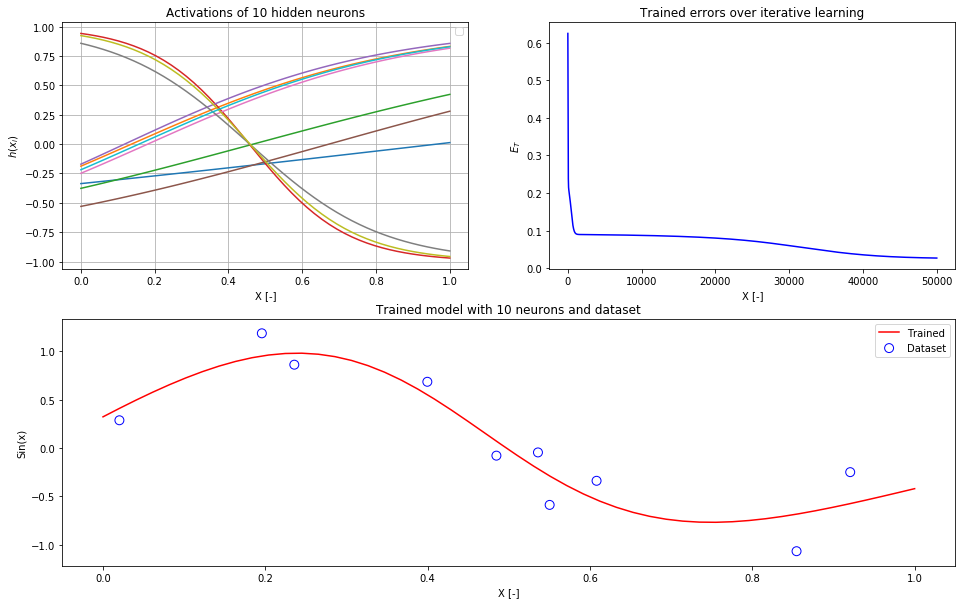

In [73]:
f = plt.figure(figsize=(16,10))
ax1 = f.add_subplot(212)
ax2 = f.add_subplot(221)
ax3 = f.add_subplot(222)
ax1.plot(reference_inputs, m_MLP_10.batch_output(reference_inputs), 'r', label = 'Trained')
ax1.scatter(x, y, s=80, facecolors='none', edgecolors='b', label = 'Dataset')
ax1.set(xlabel='X [-]', ylabel='Sin(x)',
       title='Trained model with 10 neurons and dataset')
ax1.grid()
ax1.legend()

ax2.plot(reference_inputs, activations_10)
ax2.set(xlabel='X [-]', ylabel='$h(x_i)$',
       title='Activations of 10 hidden neurons')
ax2.grid()
ax2.legend()

ax3.plot(np.linspace(0, epoch, epoch), errors_10, 'b', label = 'Train Errors with 10 neurons')
ax3.set(xlabel='X [-]', ylabel='$E_T$',
       title='Trained errors over iterative learning')
ax1.grid()
ax1.legend()

plt.show()